In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(graph, label=None):
    plt.plot(graph)
    if label is not None:
        plt.xlabel(label)
    axes = plt.gca()
#     axes.set_ylim(0, 8)
    plt.show()

In [3]:
# straight line equation.
def generate_straight_line(m=0, c=1, start=0, stop=50, increment=1):
    straight_line = list()
    for x in range(start, stop, increment):
        straight_line.append((m*x) + c)

    return np.array(straight_line)

In [4]:
# generate 30 straight lines with different slopes.
lines = []
line = generate_straight_line()
for _ in range(334):
    scaling_factor = np.random.randint(1, 5)
    scaled_line = scaling_factor * line
    rotation_factor = np.random.randint(10, 41)
    scaled_line = np.roll(scaled_line, rotation_factor)
    scaled_line[:rotation_factor] = 0
    lines.append(scaled_line)
        
print(len(lines))

334


In [5]:
# for line in lines:
#     plot(line)

In [6]:
theta = np.linspace(0, 2*np.pi, 200)
b = 1 * np.sin(theta)

In [7]:
# plot(b)

In [8]:
# plot(b[:50])

In [9]:
# plot(b[51:101])

In [10]:
# generate 30 straight lines with different slopes.
circles_up = []
circle = b[:50]
for _ in range(334):
    scaling_factor = np.random.randint(1, 5)
    scaled_circle = scaling_factor * circle
    rotation_factor = np.random.randint(10, 41)
    scaled_circle = np.roll(scaled_circle, rotation_factor)
    scaled_circle[:rotation_factor] = 0
    circles_up.append(scaled_circle)
        
print(len(circles_up))

334


In [11]:
# for circle in circles_up:
#     plot(circle)

In [12]:
# generate 30 straight lines with different slopes.
circles_down = []
circle = b[51:101]
for _ in range(334):
    scaling_factor = np.random.randint(1, 5)
    scaled_circle = scaling_factor * circle
    rotation_factor = np.random.randint(10, 41)
    scaled_circle = np.roll(scaled_circle, rotation_factor)
    scaled_circle[:rotation_factor] = 0
    circles_down.append(scaled_circle)
        
print(len(circles_down))

334


In [13]:
type(circles_down)

list

In [14]:
type(circles_down[0])

numpy.ndarray

## generating the training and testing data.

In [15]:
x = list()
x.extend(lines)
x.extend(circles_up)
x.extend(circles_down)

## convert 2d array into numpy array with dimensions (None, 50, 1).

In [16]:
# print(x)

In [17]:
x[0].shape

(50,)

In [20]:
print(x[335])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.1262742  0.25242253 0.37831923 0.50383882 0.62885617 0.75324667
 0.87688631 0.99965185 1.12142092 1.24207213 1.36148521 1.47954114
 1.59612223 1.71111227 1.82439664 1.9358624  2.04539846 2.15289562
 2.25824673 2.36134677 2.46209296 2.56038489 2.65612457 2.74921657
 2.83956809 2.92708907 3.01169226 3.09329332 3.17181093 3.24716681
 3.31928584 3.38809614 3.4535291  3.51551952 3.57400558 3.628929
 3.68023503 3.72787252]


In [21]:
x_temp = x

In [22]:
for i in range(len(x_temp)):
    x_temp[i] = np.reshape(x_temp[i], (50,1))

In [ ]:
# x[0].shape

In [ ]:
# x_np = np.zeros((99, 50), dtype=np.float32)

In [ ]:
# print(x_np)

In [ ]:
# x_np.shape

In [ ]:
# x_np[0].shape

In [ ]:
# x_np[0, :].shape

In [23]:
for index in range(1002):
    if x[index].shape != x[0].shape:
        print("mismatch ", index)

In [ ]:
# for index in range(99):
# #     print(index)
#     x_np[index, :] = x[index]

In [ ]:
# x_np.shape

In [ ]:
# x_np = np.reshape(x_np, (99, 50, 1))

In [ ]:
# len(x_np)

In [ ]:
# plot(x[668], y[668])

In [24]:
classes = ['lines', 'up', 'down']
y = list()
position = 0
for index in range(len(x)):
    y.append(classes[position])
    if index == 333:
        position += 1
    elif index == 667:
        position += 1

In [25]:
# checking for validation.
for index, value in enumerate(y):
    if index >= 0 and index < 334:
        if value != 'lines':
            print('error at index', index)
    elif index >= 334 and index < 668:
        if value != 'up':
            print('error at index', index)
    else:
        if value != 'down':
            print('error at index', index)

In [26]:
x_preshuffle = x
y_preshuffle = y

In [27]:
# for reinitializing x and y.
reinitialize = False
if reinitialize:
    x = x_preshuffle
    y = y_preshuffle

## numpy random shuffling didnt work.

In [28]:
# shuffling the array.
# random_state = np.random.get_state()
# np.random.shuffle(x)
# np.random.set_state(random_state)
# np.random.shuffle(y)

## testing shuffling with python random.

In [29]:
import random

combined_lists = list(zip(x, y))
random.shuffle(combined_lists)

x[:], y[:] = zip(*combined_lists)

In [30]:
x_plot = x
y_plot = y

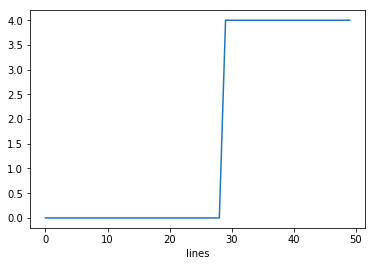

In [31]:
plot(x_plot[2], y_plot[2])

In [32]:
# for index in range(99):
#     plot(x[index], y[index])

In [33]:
len(x)

1002

In [34]:
x[0].shape

(50, 1)

In [35]:
print(set(y))

{'lines', 'up', 'down'}


In [36]:
def convertToNumbers(x):
    if x == 'lines':
        return 0
    elif x == 'up':
        return 1
    elif x == 'down':
        return 2
    else:
        return 3
    
y = [convertToNumbers(x) for x in y]

In [37]:
print(set(y))

{0, 1, 2}


In [38]:
x_train, x_test = x[:900], x[900:]

In [39]:
y_train, y_test = y[:900], y[900:]

In [ ]:
print(set(y_test))

In [ ]:
print(set(y_train))

In [ ]:
print('training data sizes:-', len(x_train), len(y_train))
print('test data sizes:-', len(x_test), len(y_test))

In [ ]:
y_categorical_train = keras.utils.to_categorical(y_train, num_classes=3)
y_categorical_test = keras.utils.to_categorical(y_test, num_classes=3)

In [ ]:
print(type(x_train), type(x_test))
print(type(y_train), type(y_test))

In [ ]:
for x in x_train:
    if x.shape != x_train[0].shape:
        print('False')

In [ ]:
x_train[0].shape

In [ ]:
x_train_np = np.array(x_train)
x_train_np = np.reshape(x_train_np, (900, 50, 1))

In [ ]:
x_test_np = np.reshape(np.array(x_test), (102, 50, 1))

## Training the convolution model.

In [ ]:
# convolution network model.
model = keras.Sequential()
model.add(keras.layers.Conv1D(filters=4, kernel_size=(3,), activation='relu', input_shape=(50,1)))
model.add(keras.layers.MaxPooling1D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
# print(model.output_shape)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [ ]:
model.fit(x_train_np, y_categorical_train, epochs=500)

In [ ]:
model.summary()

In [ ]:
model.evaluate(x_test_np, y_categorical_test)

## Training the RNN model.
### Model Parameters.
1. test window sizes in multiples of 2.
2. need to generate test data for sequences.

In [ ]:
rnn_x = list()
rnn_y = list()

In [ ]:
seq1_train_example = np.array([1, 0, 0, 0, 2])
seq2_train_example = np.array([0, 0, 0, 0, 0])
seq3_train_example = np.array([2, 0, 1, 2, 2])

In [ ]:
for index in range(99):
    if index < 33:
        rnn_x.append(seq1_train_example)
        rnn_y.append(0)
    elif index >= 33 and index < 66:
        rnn_x.append(seq2_train_example)
        rnn_y.append(1)
    else:
        rnn_x.append(seq3_train_example)
        rnn_y.append(2)

In [ ]:
import random

combined_lists = list(zip(rnn_x, rnn_y))
random.shuffle(combined_lists)

rnn_x[:], rnn_y[:] = zip(*combined_lists)

In [ ]:
index = 14
print(rnn_x[index], rnn_y[index])

In [ ]:
train_rnn_x = rnn_x[:90]
train_rnn_y = rnn_y[:90]

In [ ]:
test_rnn_x = rnn_x[90:]
test_rnn_y = rnn_y[90:]

In [ ]:
# check lengths of training, test datasets.
print(len(train_rnn_x), len(train_rnn_y))
print(len(test_rnn_x), len(test_rnn_y))

In [ ]:
train_rnn_x_np = np.array(train_rnn_x)

In [ ]:
train_rnn_x_np.shape

In [ ]:
train_rnn_x_np = np.reshape(train_rnn_x_np, (90, 5))

In [ ]:
train_rnn_y_cat = keras.utils.to_categorical(train_rnn_y, num_classes=3)

In [ ]:
test_rnn_x_np = np.array(test_rnn_x)
test_rnn_y_cat = keras.utils.to_categorical(test_rnn_y, num_classes=3)

In [ ]:
# create the model.
embedding_vector_length = 4
rnn_model = keras.models.Sequential()
rnn_model.add(keras.layers.Embedding(5, embedding_vector_length, input_length=5))
rnn_model.add(keras.layers.LSTM(100))
rnn_model.add(keras.layers.Dense(3, activation='softmax'))

In [ ]:
rnn_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adadelta(), metrics=['accuracy'])

In [ ]:
rnn_model.fit(train_rnn_x_np, train_rnn_y_cat, epochs=10)

In [ ]:
rnn_model.evaluate(test_rnn_x_np, test_rnn_y_cat)